---
title: PA 4_2
author: Marvin (Wenxiang) Li
format:
    html:
        toc: true
        code-fold: true
embed-resources: true
---

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "cleansingWine.csv"

# Load the latest version
cleansingWine = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dev7halo/wine-information",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

cleansingWine.head()

/Users/marvinlee/Documents/vs_code/gsb_544/gsb544env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/m1/tx6ck0f962jd1hq4ch5phg_80000gn/T/ipykernel_8189/494150038.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  cleansingWine = kagglehub.load_dataset(
/Users/marvinlee/Documents/vs_code/gsb_544/gsb544env/lib/python3.12/site-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (8,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


,Unnamed: 0,id,name,producer,nation,local1,local2,local3,local4,varieties1,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
2,2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750
3,3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def dataset_info(df):
    print("\n--- Shape of Data ---")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

    print("\n--- Data Types and Non-Nulls ---")
    print(df.info())

    print("\n--- First 5 Rows ---")
    print(df.head())


# 2. Missing Values
def missing_values_table(df):
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_table = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
    missing_table = missing_table[missing_table['Missing Values'] > 0]
    missing_table = missing_table.sort_values('Percent', ascending=False)

    if missing_table.empty:
        print("\nNo missing values detected.")
    else:
        print("\n--- Missing Values ---")
        print(missing_table)


# 3. Summary Stat
def summary_stats(df):
    print("\n--- Numerical Features ---")
    print(df.describe())

    print("\n--- Categorical Features ---")
    print(df.describe(include=['object']))


# 4. Duplicate Check
def check_duplicates(df):
    duplicates = df.duplicated().sum()
    print(f"\n--- Duplicates ---\nDuplicate Rows: {duplicates}")


#  5. Univariate Plots
import math

def univariate_plots(df):
    numeric_cols = df.select_dtypes(include=np.number).columns
    categorical_cols = df.select_dtypes(include='object').columns

    # Plot numeric distributions (2 per row)
    print("\n--- Numeric Distributions ---")
    n = len(numeric_cols)
    rows = math.ceil(n / 2)

    fig, axes = plt.subplots(rows, 2, figsize=(12, 3 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')

    # Hide empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    # Plot categorical counts (2 per row)
    #print("\n--- Categorical Counts ---")
    #n = len(categorical_cols)
    #rows = math.ceil(n / 2)

    #fig, axes = plt.subplots(rows, 2, figsize=(12, 3 * rows))
    #axes = axes.flatten()

    #for i, col in enumerate(categorical_cols):
        #df[col].value_counts().plot(kind='bar', ax=axes[i])
        #axes[i].set_title(f'Counts of {col}')

    #for j in range(i + 1, len(axes)):
        #fig.delaxes(axes[j])

    #plt.tight_layout()
    #plt.show()



# 6. heatmap
def correlation_heatmap(df):
    numeric_cols = df.select_dtypes(include=np.number)
    if numeric_cols.shape[1] > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm')
        plt.title('Correlation Heatmap')
        plt.show()
    else:
        print("\nNot enough numeric columns for correlation heatmap.")


# run everything
def run_eda(df):
    dataset_info(df)
    missing_values_table(df)
    summary_stats(df)
    check_duplicates(df)
    univariate_plots(df)
    #correlation_heatmap(df)

    print("\nEDA Complete!")




--- Shape of Data ---
Rows: 21605, Columns: 32

--- Data Types and Non-Nulls ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21605 entries, 0 to 21604
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   21605 non-null  int64 
 1   id           21605 non-null  int64 
 2   name         21605 non-null  object
 3   producer     21605 non-null  object
 4   nation       21603 non-null  object
 5   local1       20705 non-null  object
 6   local2       11145 non-null  object
 7   local3       3591 non-null   object
 8   local4       2 non-null      object
 9   varieties1   21256 non-null  object
 10  varieties2   7518 non-null   object
 11  varieties3   4028 non-null   object
 12  varieties4   1330 non-null   object
 13  varieties5   379 non-null    object
 14  varieties6   105 non-null    object
 15  varieties7   31 non-null     object
 16  varieties8   18 non-null     object
 17  varieties9   7 non-null  

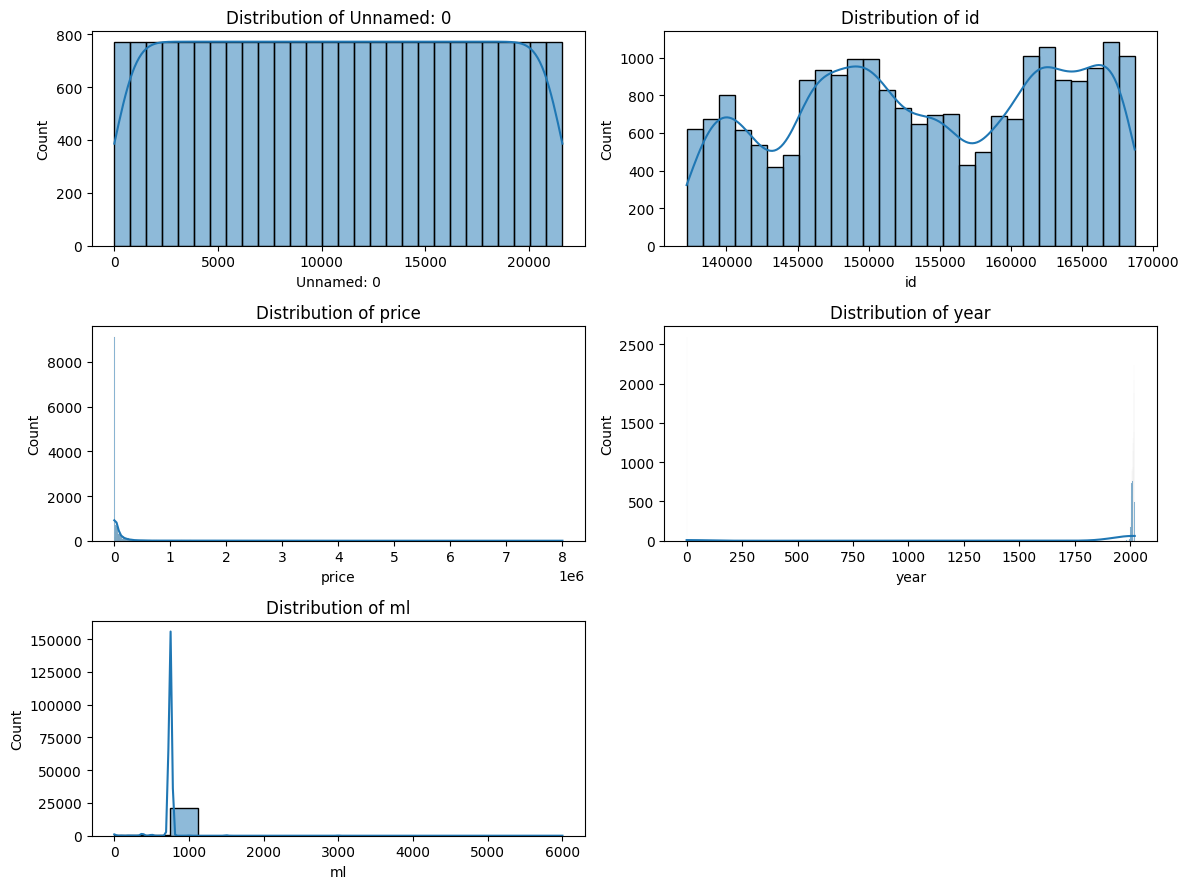


EDA Complete!


In [4]:
run_eda(cleansingWine)

In [5]:
zero_count = (cleansingWine['price'] != 0).sum()
print(zero_count)

12512


Get rid off 0 values

In [6]:
wine_df = cleansingWine[cleansingWine['price'] != 0].copy()

In [7]:
wine_df = wine_df[wine_df['year'] != 0].copy()

In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11069 entries, 0 to 21604
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   11069 non-null  int64 
 1   id           11069 non-null  int64 
 2   name         11069 non-null  object
 3   producer     11069 non-null  object
 4   nation       11069 non-null  object
 5   local1       10846 non-null  object
 6   local2       6303 non-null   object
 7   local3       2224 non-null   object
 8   local4       0 non-null      object
 9   varieties1   10937 non-null  object
 10  varieties2   3815 non-null   object
 11  varieties3   2099 non-null   object
 12  varieties4   736 non-null    object
 13  varieties5   207 non-null    object
 14  varieties6   55 non-null     object
 15  varieties7   17 non-null     object
 16  varieties8   8 non-null      object
 17  varieties9   4 non-null      object
 18  varieties10  4 non-null      object
 19  varieties11  3 non-null      o

In [9]:
cleansingWine.columns

Index(['Unnamed: 0', 'id', 'name', 'producer', 'nation', 'local1', 'local2',
       'local3', 'local4', 'varieties1', 'varieties2', 'varieties3',
       'varieties4', 'varieties5', 'varieties6', 'varieties7', 'varieties8',
       'varieties9', 'varieties10', 'varieties11', 'varieties12', 'type',
       'use', 'abv', 'degree', 'sweet', 'acidity', 'body', 'tannin', 'price',
       'year', 'ml'],
      dtype='object')

In [10]:
columns_to_keep = ['nation', 'local1', 'varieties1',
       'use', 'sweet', 'acidity', 'body', 'tannin', 'price',
       'year', 'ml']

In [11]:
wine_df_clean = wine_df[columns_to_keep]

In [12]:
print(wine_df_clean[wine_df_clean.isnull().any(axis=1)])


         nation              local1          varieties1                 use  \
400      Canada  Cabernet Sauvignon                 NaN               Table   
671    Portugal               Douro                 NaN               Table   
679       Spain                 NaN            Garnacha               Table   
680       Spain                 NaN            Garnacha               Table   
1041     France  Cabernet Sauvignon                 NaN               Table   
...         ...                 ...                 ...                 ...   
21247     Italy             Toscana          Sangiovese               Table   
21327       USA          California  Cabernet Sauvignon                 NaN   
21346   Austria                 NaN                 NaN    Appetizer, Table   
21347     Italy              Puglia          Negroamaro               Table   
21477     Italy                 NaN               Blend  Appetizer, Dessert   

        sweet   acidity   body   tannin    price  y

Filling missing info based on actual wine infomation

In [13]:
wine_df_clean.loc[18139, 'use'] = 'Etc'
wine_df_clean.loc[19973, 'use'] = 'Table'
wine_df_clean.loc[20247, 'use'] = 'Table'
wine_df_clean.loc[20286, 'use'] = 'Table'
wine_df_clean.loc[21246, 'use'] = 'Appetizer, Table'
wine_df_clean.loc[21327, 'use'] = 'Table'
wine_df_clean.loc[21247, 'sweet'] = 'SWEET1'
wine_df_clean.loc[21347, 'sweet'] = 'SWEET1'

In [14]:
print(wine_df_clean[wine_df_clean.isnull().any(axis=1)])
print(wine_df_clean[wine_df_clean['year'] == 0])

                             nation              local1 varieties1  \
400                          Canada  Cabernet Sauvignon        NaN   
671                        Portugal               Douro        NaN   
679                           Spain                 NaN   Garnacha   
680                           Spain                 NaN   Garnacha   
1041                         France  Cabernet Sauvignon        NaN   
...                             ...                 ...        ...   
20961  the Republic of South Africa        Chenin Blanc        NaN   
20962  the Republic of South Africa        Chenin Blanc        NaN   
21042                         Spain             Penedes        NaN   
21346                       Austria                 NaN        NaN   
21477                         Italy                 NaN      Blend   

                      use   sweet   acidity   body   tannin    price  year  \
400                 Table  SWEET1  ACIDITY4  BODY3  TANNIN3    90000  2013   
671

In [15]:
wine_df_clean['sweet'].unique()

array(['SWEET1', 'SWEET2', 'SWEET5', 'SWEET3', 'SWEET4'], dtype=object)

In [16]:
wine_df_clean = wine_df_clean.copy()
wine_df_clean.loc[:, 'sweet_num'] = wine_df_clean['sweet'].astype(str).str.extract(r'(\d+)')[0].astype(int)
wine_df_clean.loc[:, 'acidity_num'] = wine_df_clean['acidity'].astype(str).str.extract(r'(\d+)')[0].astype(int)
wine_df_clean.loc[:, 'body_num'] = wine_df_clean['body'].astype(str).str.extract(r'(\d+)')[0].astype(int)
wine_df_clean.loc[:, 'tannin_num'] = wine_df_clean['tannin'].astype(str).str.extract(r'(\d+)')[0].astype(int)

In [17]:
wine_df_clean = wine_df_clean.fillna(value={'local1': 'Unknown', 'varieties1': 'Unknown'})


In [18]:
wine_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11069 entries, 0 to 21604
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nation       11069 non-null  object
 1   local1       11069 non-null  object
 2   varieties1   11069 non-null  object
 3   use          11069 non-null  object
 4   sweet        11069 non-null  object
 5   acidity      11069 non-null  object
 6   body         11069 non-null  object
 7   tannin       11069 non-null  object
 8   price        11069 non-null  int64 
 9   year         11069 non-null  int64 
 10  ml           11069 non-null  int64 
 11  sweet_num    11069 non-null  int64 
 12  acidity_num  11069 non-null  int64 
 13  body_num     11069 non-null  int64 
 14  tannin_num   11069 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.6+ MB


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [20]:
wine_df_clean['log_price'] = np.log(wine_df_clean['price'])
X = wine_df_clean.drop(['price', 'log_price', 'sweet', 'acidity', 'body', 'tannin'], axis=1)
y = wine_df_clean['log_price'].astype('float32')

In [21]:
X.shape

(11069, 10)

In [22]:
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [23]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop = 'first'), cat_cols)
])

In [24]:
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

In [26]:
input1 = keras.Input(shape=(X_train.shape[1],))
x1 = layers.Dense(128, activation='relu')(input1)
x1 = layers.Dense(64, activation='relu')(x1)
x1 = layers.Dense(16, activation='relu')(x1)
output1 = layers.Dense(1, activation='linear')(x1)
model1 = keras.Model(inputs=input1, outputs=output1)

2025-05-07 21:47:16.968735: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-05-07 21:47:16.968761: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-07 21:47:16.968765: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-07 21:47:16.968781: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-07 21:47:16.968793: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [27]:
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 462)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        59,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,577 (267.88 KB)

 Trainable params: 68,577 (267.88 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model1.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mse', 'mae'])
history1 = model1.fit(X_train, y_train, batch_size = 64, callbacks=[early_stop], epochs=100, validation_split =0.1)

Epoch 1/100


2025-05-07 21:47:17.824980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 54.1813 - mae: 6.0818 - mse: 54.1813 - val_loss: 0.9816 - val_mae: 0.7063 - val_mse: 0.9816
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7943 - mae: 0.6638 - mse: 0.7943 - val_loss: 0.8262 - val_mae: 0.6293 - val_mse: 0.8262
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6823 - mae: 0.6029 - mse: 0.6823 - val_loss: 0.9470 - val_mae: 0.6197 - val_mse: 0.9470
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6170 - mae: 0.5730 - mse: 0.6170 - val_loss: 0.6266 - val_mae: 0.5674 - val_mse: 0.6266
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5586 - mae: 0.5423 - mse: 0.5586 - val_loss: 0.6466 - val_mae: 0.5786 - val_mse: 0.6466
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5221 - mae: 0.5264 - mse: 0.5221 - val_loss: 0.6056 - val_mae: 0.5659 - val_mse: 0.6056
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5404 - mae: 0.5457 - mse: 0.5404 - va

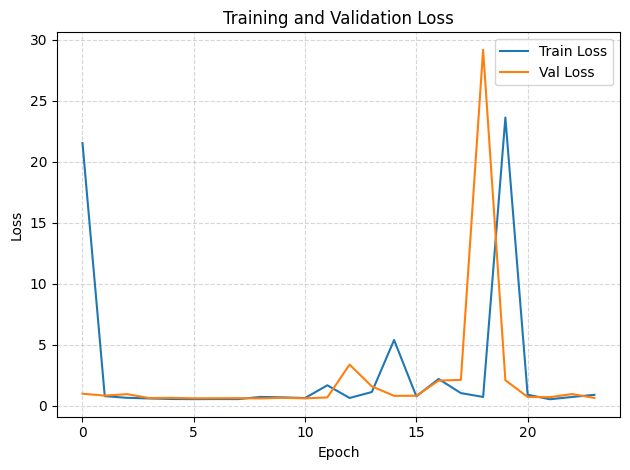

In [32]:
import matplotlib.pyplot as plt

plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [33]:
scores = model1.evaluate(X_test, y_test)
print(f"Test MSE: {scores[0]:.4f}")
print(f"Test MAE: {scores[1]:.4f}")
print(f"Test RMSE: {scores[2]:.4f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5885 - mae: 0.5683 - mse: 0.5885
Test MSE: 0.6103
Test MAE: 0.6103
Test RMSE: 0.5722


In [34]:
y_pred_log = model1.predict(X_test)
y_pred_norm = np.exp(y_pred_log.flatten())
y_true = np.exp(y_test)

mse = mean_squared_error(y_true, y_pred_norm)
rmse = root_mean_squared_error(y_true, y_pred_norm)
mae = mean_absolute_error(y_true, y_pred_norm)
r2 = r2_score(y_true, y_pred_norm)
print(f"Test RMSE Norm: {rmse:.4f}")
print(f"Test MSE Norm: {mse:.4f}")
print(f"Test MAE Norm: {mae:.4f}")
print(f"Test R2 Norm: {r2:.4f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test RMSE Norm: 269540.1250
Test MSE Norm: 72651882496.0000
Test MAE Norm: 99376.4766
Test R2 Norm: 0.1670


In [35]:
input2 = keras.Input(shape=(X_train.shape[1],))
x2 = layers.Dense(128, activation='relu')(input2)
output2 = layers.Dense(1, activation='linear')(x2)  # for binary classification
model2 = keras.Model(inputs=input2, outputs=output2)

In [57]:
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 462)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        59,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,181 (696.02 KB)

 Trainable params: 59,393 (232.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 118,788 (464.02 KB)

In [36]:
model2.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mse', 'mae'])
history2 = model2.fit(X_train, y_train, batch_size = 128, callbacks=[early_stop], epochs=100, validation_split =0.1)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 105.7553 - mae: 10.1696 - mse: 105.7553 - val_loss: 39.4462 - val_mae: 6.1803 - val_mse: 39.4462
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.5066 - mae: 4.6259 - mse: 24.5066 - val_loss: 2.2699 - val_mae: 1.0860 - val_mse: 2.2699
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6082 - mae: 0.9463 - mse: 1.6082 - val_loss: 1.2277 - val_mae: 0.8092 - val_mse: 1.2277
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0146 - mae: 0.7628 - mse: 1.0146 - val_loss: 1.0192 - val_mae: 0.7168 - val_mse: 1.0192
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.8395 - mae: 0.6902 - mse: 0.8395 - val_loss: 0.9040 - val_mae: 0.6726 - val_mse: 0.9040
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7295 - mae: 0.6378 - mse: 0.7295 - val_loss: 0.8314 - val_mae: 0.6448 - val_mse: 0.8314
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6754 - mae: 0.6144 - mse: 0.6754 - 

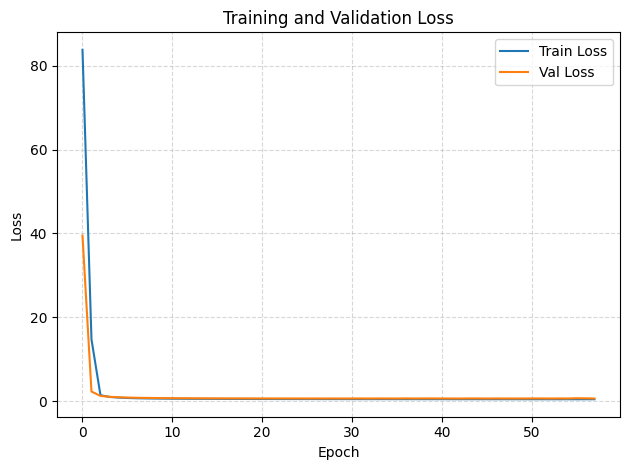

In [37]:
import matplotlib.pyplot as plt

plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [38]:
scores2 = model2.evaluate(X_test, y_test)
print(f"Test MSE: {scores2[0]:.4f}")
print(f"Test MAE: {scores2[1]:.4f}")
print(f"Test RMSE: {scores2[2]:.4f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5854 - mae: 0.5511 - mse: 0.5854
Test MSE: 0.5778
Test MAE: 0.5778
Test RMSE: 0.5532


In [39]:
y_pred_log2 = model2.predict(X_test)
y_pred_norm2 = np.exp(y_pred_log2.flatten())
y_true = np.exp(y_test)

mse2 = mean_squared_error(y_true, y_pred_norm2)
rmse2 = root_mean_squared_error(y_true, y_pred_norm2)
mae2 = mean_absolute_error(y_true, y_pred_norm2)
r22 = r2_score(y_true, y_pred_norm2)
print(f"Test RMSE Norm: {rmse2:.4f}")
print(f"Test MSE Norm: {mse2:.4f}")
print(f"Test MAE Norm: {mae2:.4f}")
print(f"Test R2 Norm: {r22:.4f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test RMSE Norm: 257638.4531
Test MSE Norm: 66377576448.0000
Test MAE Norm: 94862.5000
Test R2 Norm: 0.2389


In [40]:
input3 = keras.Input(shape=(X_train.shape[1],))
x3 = layers.Dense(128, activation='tanh')(input3)
output3 = layers.Dense(1, activation='linear')(x3)  # for binary classification
model3 = keras.Model(inputs=input3, outputs=output3)

In [41]:
model3.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)
history3 = model3.fit(X_train, y_train, batch_size = 128, callbacks=[early_stop], epochs=100, validation_split =0.1)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 104.5294 - mae: 10.1118 - mse: 104.5294 - val_loss: 32.7003 - val_mae: 5.6192 - val_mse: 32.7003
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 18.1067 - mae: 3.8780 - mse: 18.1067 - val_loss: 1.5188 - val_mae: 0.8517 - val_mse: 1.5188
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1075 - mae: 0.8071 - mse: 1.1075 - val_loss: 1.1140 - val_mae: 0.7395 - val_mse: 1.1140
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8565 - mae: 0.7052 - mse: 0.8565 - val_loss: 0.9422 - val_mae: 0.6801 - val_mse: 0.9422
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7346 - mae: 0.6481 - mse: 0.7346 - val_loss: 0.8374 - val_mae: 0.6439 - val_mse: 0.8374
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6180 - mae: 0.5970 - mse: 0.6180 - val_loss: 0.7717 - val_mae: 0.6243 - val_mse: 0.7717
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5923 - mae: 0.5813 - mse: 0.5923 - 

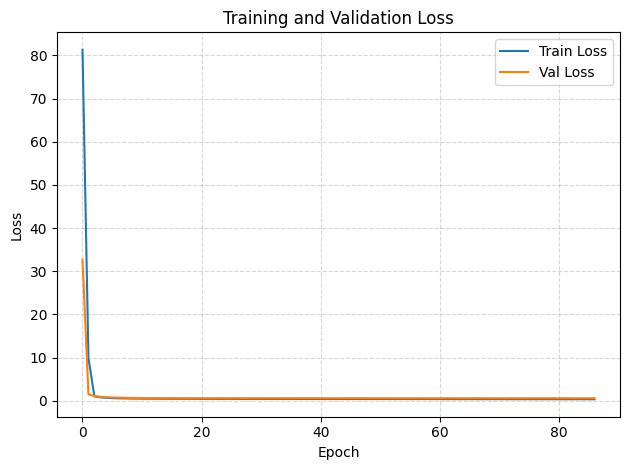

In [42]:
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [43]:
scores3 = model3.evaluate(X_test, y_test)
print(f"Test MSE: {scores3[0]:.4f}")
print(f"Test MAE: {scores3[1]:.4f}")
print(f"Test RMSE: {scores3[2]:.4f}")
y_pred_log3 = model3.predict(X_test)
y_pred_norm3 = np.exp(y_pred_log3.flatten())
y_true = np.exp(y_test)

mse3 = mean_squared_error(y_true, y_pred_norm3)
rmse3 = root_mean_squared_error(y_true, y_pred_norm3)
mae3 = mean_absolute_error(y_true, y_pred_norm3)
r23 = r2_score(y_true, y_pred_norm3)
print(f"Test RMSE Norm: {rmse3:.4f}")
print(f"Test MSE Norm: {mse3:.4f}")
print(f"Test MAE Norm: {mae3:.4f}")
print(f"Test R2 Norm: {r23:.4f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5653 - mae: 0.5276 - mse: 0.5653
Test MSE: 0.5385
Test MAE: 0.5244
Test RMSE: 0.5385
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test RMSE Norm: 251098.1719
Test MSE Norm: 63050289152.0000
Test MAE Norm: 90648.0781
Test R2 Norm: 0.2771


In [44]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [45]:
X2 = wine_df_clean.drop(['nation', 'log_price', 'local1'], axis=1)
y2 = wine_df_clean['nation']

In [46]:
le = LabelEncoder()
y2 = le.fit_transform(y2)

In [47]:
num_cols2 = X2.select_dtypes(include=['number']).columns.tolist()
cat_cols2 = X2.select_dtypes(include=['object', 'category']).columns.tolist()
preprocessor2 = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols2),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop = 'first'), cat_cols2)
])

In [48]:
X2_processed = preprocessor2.fit_transform(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_processed, y2, test_size=0.2, random_state=42)

In [49]:
num_classes = len(np.unique(y_train2))
num_classes

27

In [50]:
#construct the model
inputs4 = keras.Input(shape=(X_train2.shape[1],))
x4 = layers.Dense(128, activation = 'relu')(inputs4)
x4 = layers.Dense(64, activation = 'relu')(x4)
x4 = layers.Dense(32, activation = 'relu')(x4)
outputs4 = layers.Dense(num_classes, activation='softmax')(x4)
model4 = keras.Model(inputs=inputs4, outputs=outputs4)

In [51]:
model4.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history4 = model4.fit(X_train2, y_train2, batch_size = 128, callbacks=[early_stop], epochs=100, validation_split=0.1)

scores = model4.evaluate(X_test2, y_test2, verbose=2)

Epoch 1/100


/Users/marvinlee/Documents/vs_code/gsb_544/gsb544env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2649 - loss: 2.5324 - val_accuracy: 0.4233 - val_loss: 1.7387
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4846 - loss: 1.6599 - val_accuracy: 0.5564 - val_loss: 1.4773
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5669 - loss: 1.3979 - val_accuracy: 0.5688 - val_loss: 1.4127
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5833 - loss: 1.3088 - val_accuracy: 0.5700 - val_loss: 1.3572
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5954 - loss: 1.2616 - val_accuracy: 0.5914 - val_loss: 1.3515
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5979 - loss: 1.2460 - val_accuracy: 0.5835 - val_loss: 1.3548
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6018 - loss: 1.2323 - val_accuracy: 0.6106 - val_loss: 1.3330
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6153 - loss: 1.2066 - val_accuracy: 0.5745 - val_loss: 1.

In [52]:
y_pred_proba4 = model4.predict(X_test2)
y_pred_class4 = np.argmax(y_pred_proba4, axis=1)
print(classification_report(y_test2, y_pred_class4))

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.69      0.39      0.50        56
           1       0.34      0.18      0.23       125
           2       0.00      0.00      0.00        11
           4       0.43      0.50      0.46         6
           5       0.40      0.50      0.44       217
           8       0.58      0.84      0.69       705
           9       0.00      0.00      0.00         5
          10       0.75      0.82      0.79        40
          11       1.00      0.14      0.25         7
          12       0.50      0.50      0.50         4
          14       0.88      0.78      0.83       368
          15       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         3
          18       0.38      0.09      0.14        35
          19       0.00      0.00      0.00        17
          20       0.00      0.00      0.00         3
          21       0.00      0.00      0.0

/Users/marvinlee/Documents/vs_code/gsb_544/gsb544env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marvinlee/Documents/vs_code/gsb_544/gsb544env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marvinlee/Documents/vs_code/gsb_544/gsb544env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

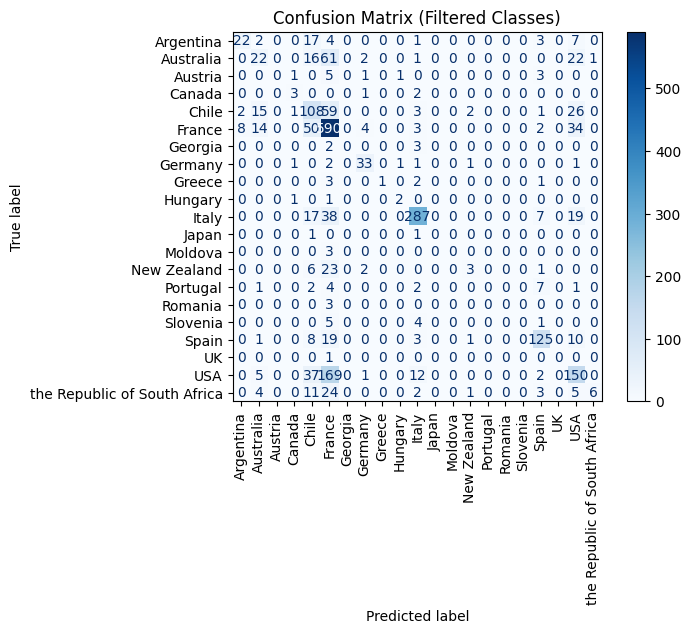

In [53]:
# Get unique classes in test set (sorted for consistent plotting)
present_classes = np.unique(y_test2)

# Build confusion matrix using only present labels
cm4 = confusion_matrix(y_test2, y_pred_class4, labels=present_classes)

# Optional: decode labels if using LabelEncoder
label_names = le.inverse_transform(present_classes) if 'le' in globals() else present_classes

# Display

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Filtered Classes)")
plt.xticks(rotation=90)
plt.show()


In [54]:
#construct the model
inputs5 = keras.Input(shape=(X_train2.shape[1],))
x5 = layers.Dense(128, activation = 'relu')(inputs5)
outputs5 = layers.Dense(num_classes, activation='softmax')(x5)
model5 = keras.Model(inputs=inputs5, outputs=outputs5)
model5.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history5 = model5.fit(X_train2, y_train2, batch_size = 128, callbacks=[early_stop], epochs=100, validation_split=0.1)

scores5 = model5.evaluate(X_test2, y_test2, verbose=2)

Epoch 1/100


/Users/marvinlee/Documents/vs_code/gsb_544/gsb544env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2745 - loss: 2.6713 - val_accuracy: 0.4865 - val_loss: 1.7342
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4840 - loss: 1.7035 - val_accuracy: 0.5429 - val_loss: 1.5197
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5597 - loss: 1.4622 - val_accuracy: 0.5926 - val_loss: 1.3973
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5941 - loss: 1.3193 - val_accuracy: 0.5937 - val_loss: 1.3305
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6124 - loss: 1.2458 - val_accuracy: 0.5982 - val_loss: 1.2905
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6133 - loss: 1.1977 - val_accuracy: 0.6117 - val_loss: 1.2756
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6172 - loss: 1.1748 - val_accuracy: 0.6129 - val_loss: 1.2582
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6184 - loss: 1.1685 - val_accuracy: 0.6129 - val_loss: 1.

In [55]:
y_pred_proba5 = model5.predict(X_test2)
y_pred_class5 = np.argmax(y_pred_proba5, axis=1)
print(classification_report(y_test2, y_pred_class5))

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.71      0.48      0.57        56
           1       0.38      0.24      0.29       125
           2       0.83      0.45      0.59        11
           4       0.67      0.67      0.67         6
           5       0.44      0.47      0.45       217
           8       0.58      0.79      0.67       705
           9       1.00      0.40      0.57         5
          10       0.76      0.88      0.81        40
          11       0.80      0.57      0.67         7
          12       1.00      0.75      0.86         4
          14       0.88      0.82      0.85       368
          15       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         3
          18       0.38      0.17      0.24        35
          19       0.58      0.41      0.48        17
          20       0.00      0.00      0.00         3
          21       0.00      0.00      0.0

/Users/marvinlee/Documents/vs_code/gsb_544/gsb544env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marvinlee/Documents/vs_code/gsb_544/gsb544env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marvinlee/Documents/vs_code/gsb_544/gsb544env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

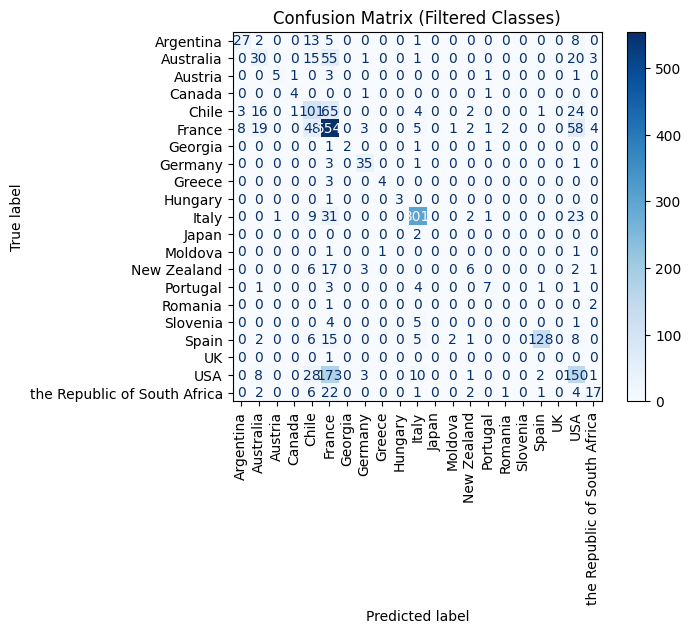

In [56]:
# Get unique classes in test set (sorted for consistent plotting)
present_classes = np.unique(y_test2)

# Build confusion matrix using only present labels
cm5 = confusion_matrix(y_test2, y_pred_class5, labels=present_classes)

# Optional: decode labels if using LabelEncoder
label_names = le.inverse_transform(present_classes) if 'le' in globals() else present_classes

# Display

disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Filtered Classes)")
plt.xticks(rotation=90)
plt.show()

**Model Summary**
- Overall, the features don't have much prediting power in terms of price and nations.
- For price, the data is long tail. There are outliners like 8,000,000 won.
- For nation, the target is extrmely discrete with limit features to distinguish them besides local1. Local 1, if used, makes the analysis meaningles since it is basically nation itself.  
- Reduing layer does not reduce the model performance.